In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, accuracy_score

### Held-Out Evaluation

In [2]:
predict = pd.read_csv('predict/data_v5/cnn_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_ent = pd.read_csv('predict/data_v5/cnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_base = pd.read_csv('predict/data_v5/cnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_ent = pd.read_csv('predict/data_v5/pcnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [3]:
# Calculate model performance
label = np.array(predict['label'], dtype=int)
label_scores = np.array(predict['dist'])
precision, recall, thresholds = precision_recall_curve(label, label_scores)

label_ent = np.array(predict_ent['label'], dtype=int)
label_scores_ent = np.array(predict_ent['dist'])
precision_ent, recall_ent, thresholds_ent = precision_recall_curve(label_ent, label_scores_ent)

label_pcnn_ent = np.array(predict_pcnn_ent['label'], dtype=int)
label_scores_pcnn_ent = np.array(predict_pcnn_ent['dist'])
precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent = precision_recall_curve(label_pcnn_ent, label_scores_pcnn_ent)

# Calculate baseline performance
label_base = np.array(predict_base['label'], dtype=int)
label_scores_base = np.array(predict_base['dist'])
precision_base, recall_base, thresholds_base = precision_recall_curve(label_base, label_scores_base)

<Figure size 432x288 with 0 Axes>

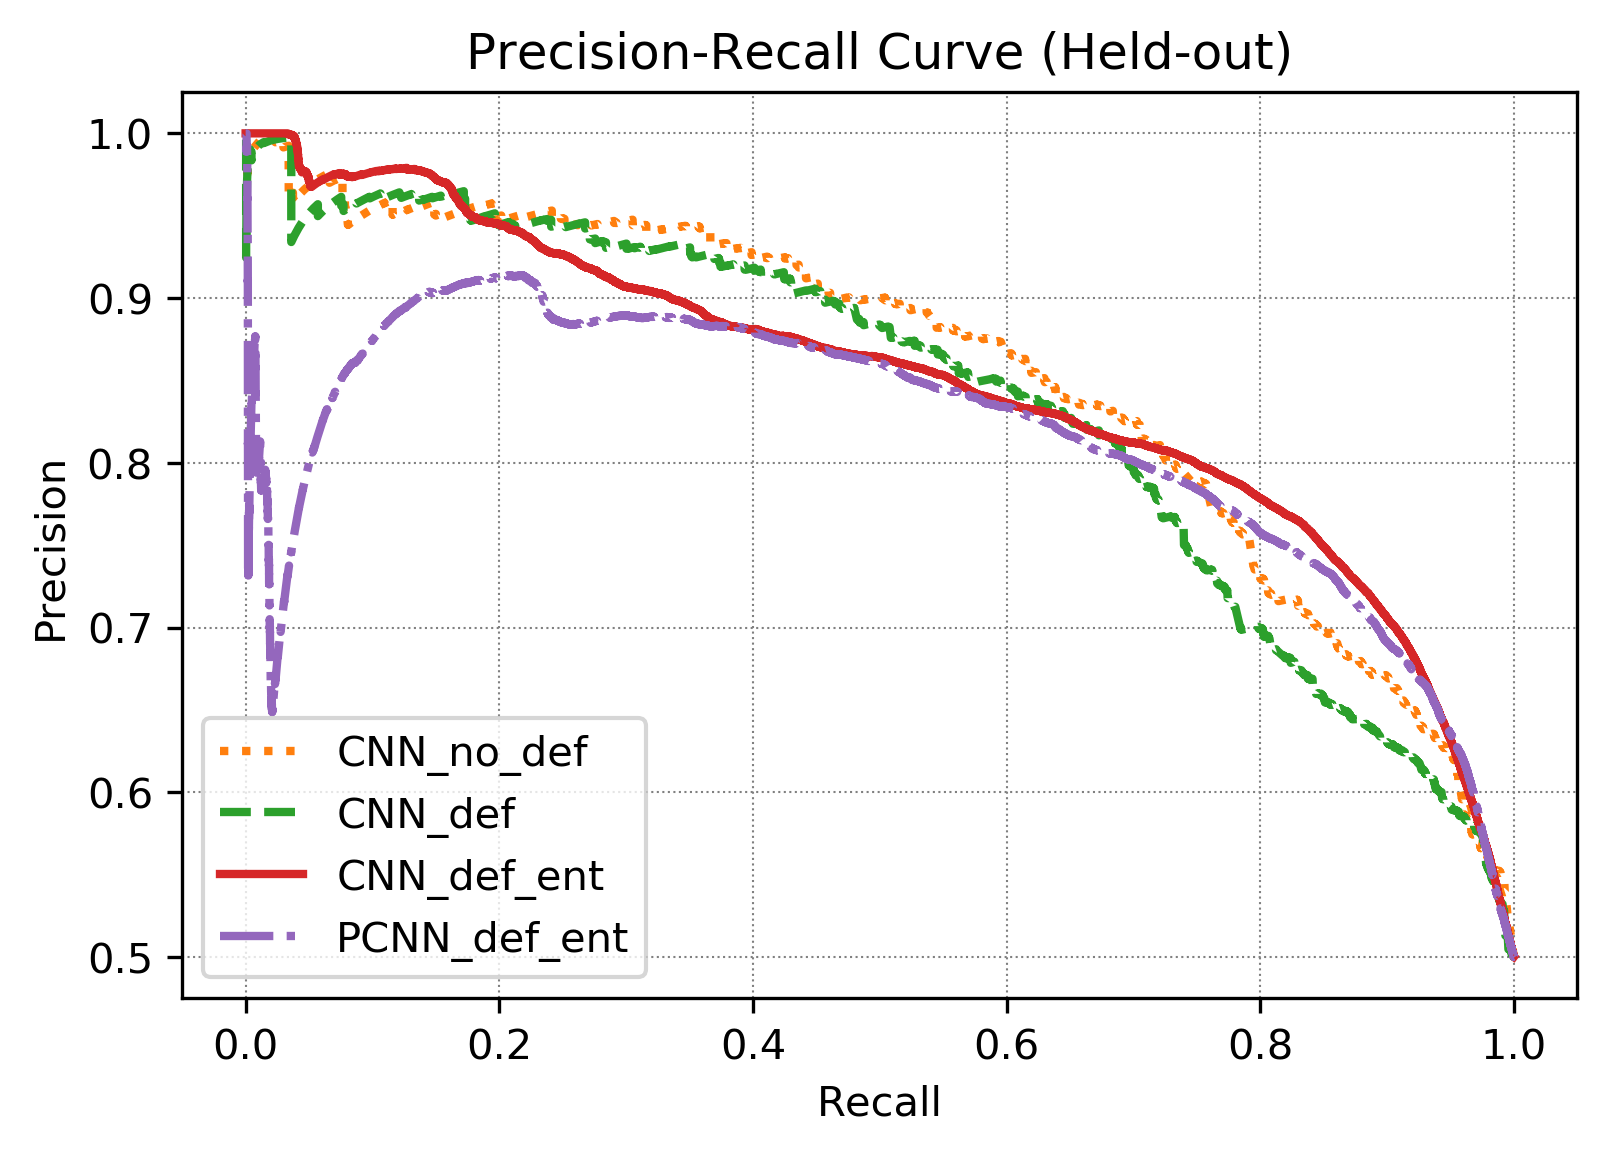

In [4]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
plt.plot(recall_base, precision_base, lw=2, color='C1', ls=':', label='CNN_no_def')
plt.plot(recall, precision, lw=2, color='C2', ls='--', label='CNN_def')
plt.plot(recall_ent, precision_ent, lw=2, color='C3', ls='-', label='CNN_def_ent')
plt.plot(recall_pcnn_ent, precision_pcnn_ent, lw=2, color='C4', ls='-.', label='PCNN_def_ent')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Held-out)')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.legend(loc='lower left')
plt.show()

In [5]:
average_precision_score(label_base, label_scores_base), average_precision_score(label, label_scores), average_precision_score(label_ent, label_scores_ent), average_precision_score(label_pcnn_ent, label_scores_pcnn_ent)

(0.8541607452092778,
 0.8377100015586285,
 0.8486914263120912,
 0.8152650142856672)

### Manual Evaluation

In [6]:
predict_g = pd.read_csv('predict/data_v5/gold/cnn_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_ent_g = pd.read_csv('predict/data_v5/gold/cnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_base_g = pd.read_csv('predict/data_v5/gold/cnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_ent_g = pd.read_csv('predict/data_v5/gold/pcnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [7]:
# Calculate model performance
label_g = np.array(predict_g['label'], dtype=int)
label_scores_g = np.array(predict_g['dist'])
precision_g, recall_g, thresholds_g = precision_recall_curve(label_g, label_scores_g)

label_ent_g = np.array(predict_ent_g['label'], dtype=int)
label_scores_ent_g = np.array(predict_ent_g['dist'])
precision_ent_g, recall_ent_g, thresholds_ent_g = precision_recall_curve(label_ent_g, label_scores_ent_g)

label_pcnn_ent_g = np.array(predict_pcnn_ent_g['label'], dtype=int)
label_scores_pcnn_ent_g = np.array(predict_pcnn_ent_g['dist'])
precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g = precision_recall_curve(label_pcnn_ent_g, label_scores_pcnn_ent_g)

# Calculate baseline performance
label_base_g = np.array(predict_base_g['label'], dtype=int)
label_scores_base_g = np.array(predict_base_g['dist'])
precision_base_g, recall_base_g, thresholds_base_g = precision_recall_curve(label_base_g, label_scores_base_g)

<Figure size 432x288 with 0 Axes>

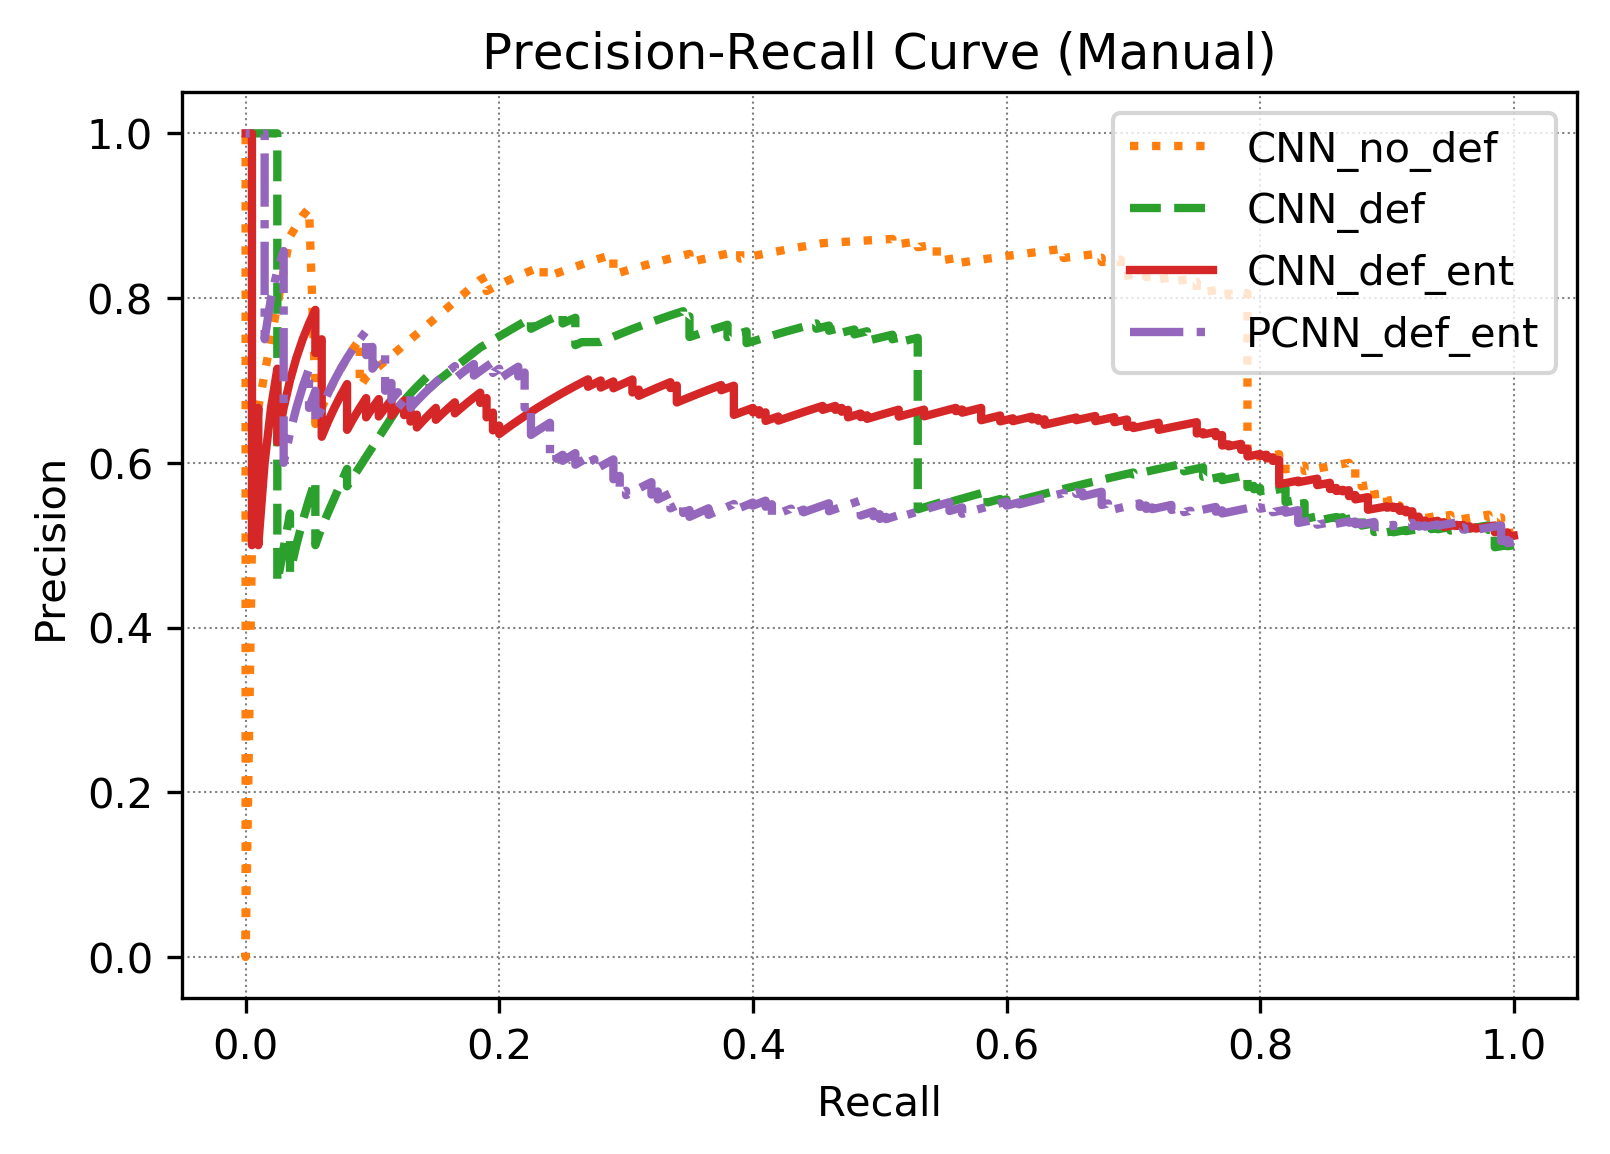

In [8]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
plt.plot(recall_base_g, precision_base_g, lw=2, color='C1', ls=':', label='CNN_no_def')
plt.plot(recall_g, precision_g, lw=2, color='C2', ls='--', label='CNN_def')
plt.plot(recall_ent_g, precision_ent_g, lw=2, color='C3', ls='-', label='CNN_def_ent')
plt.plot(recall_pcnn_ent_g, precision_pcnn_ent_g, lw=2, color='C4', ls='-.', label='PCNN_def_ent')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Manual)')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.legend(loc='upper right')
plt.show()

In [9]:
average_precision_score(label_base_g, label_scores_base_g), average_precision_score(label_g, label_scores_g), average_precision_score(label_ent_g, label_scores_ent_g), average_precision_score(label_pcnn_ent_g, label_scores_pcnn_ent_g)

(0.7782728601520936,
 0.6535422927375863,
 0.6452391142909517,
 0.5903171415056183)

### Decision Threshold

In [10]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    prec = precisions[:-1]
    rec = recalls[:-1]
    plt.figure(dpi=300)
    plt.grid(color='grey', lw=0.5, linestyle='dotted')
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, prec, "b--", label="Precision")
    plt.plot(thresholds, rec, "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

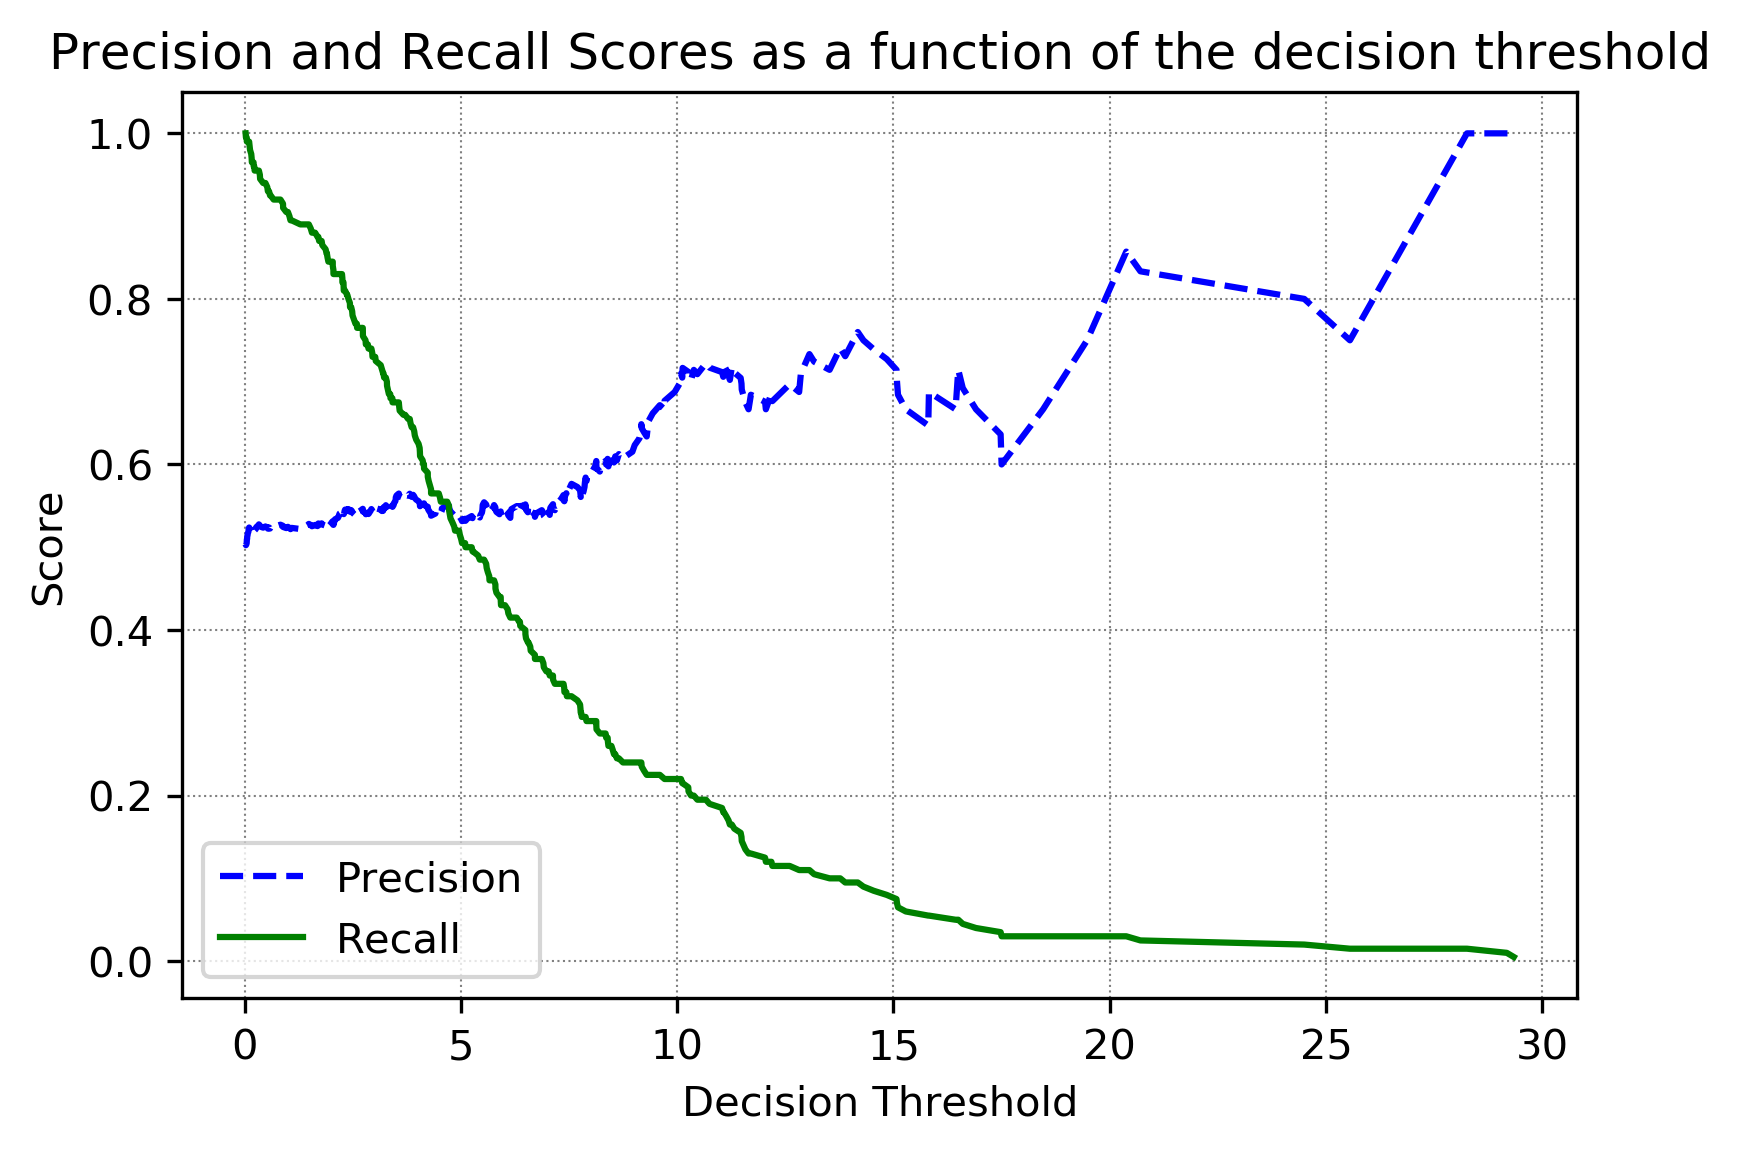

In [11]:
plot_precision_recall_vs_threshold(precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g)

In [12]:
def get_threshold(precisions, recalls, thresholds):
    idx = np.argwhere(np.diff(np.sign(precisions[:-1] - recalls[:-1]))).flatten()
    return thresholds[idx][0]

In [13]:
get_threshold(precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g)

4.683788776397705

### Reformat Alignment Result & Calculate Performance

In [14]:
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'gold_label']
test_align = pd.read_csv('dataset/test_align_gold.tsv', sep='\t', header=None, names=data_header)
test_align.drop(['e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id', 'e1_oie_root', 'e2_oie_root'], axis=1, inplace=True)

test_align['dist_cnn_no_def'] = predict_base_g['dist']
test_align['dist_cnn_def'] = predict_g['dist']
test_align['dist_cnn_def_ent'] = predict_ent_g['dist']
test_align['dist_pcnn_def_ent'] = predict_pcnn_ent_g['dist']

t_cnn_no_def = get_threshold(precision_base, recall_base, thresholds_base)
t_cnn_def = get_threshold(precision, recall, thresholds)
t_cnn_def_ent = get_threshold(precision_ent, recall_ent, thresholds_ent)
t_pcnn_def_ent = get_threshold(precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent)

test_align['pred_cnn_no_def'] = [0 if d <= t_cnn_no_def else 1 for d in test_align['dist_cnn_no_def']]
test_align['pred_cnn_def'] = [0 if d <= t_cnn_def else 1 for d in test_align['dist_cnn_def']]
test_align['pred_cnn_def_ent'] = [0 if d <= t_cnn_def_ent else 1 for d in test_align['dist_cnn_def_ent']]
test_align['pred_pcnn_def_ent'] = [0 if d <= t_pcnn_def_ent else 1 for d in test_align['dist_pcnn_def_ent']]

test_align = test_align[[
                'e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
                'dist_cnn_no_def', 'dist_cnn_def', 'dist_cnn_def_ent', 'dist_pcnn_def_ent',
                'pred_cnn_no_def', 'pred_cnn_def', 'pred_cnn_def_ent', 'pred_pcnn_def_ent',
                'gold_label']]

In [15]:
eval_table = pd.DataFrame(index=['CESI', 'CNN_no_def', 'CNN_def', 'CNN_def_ent', 'PCNN_def_ent'])
eval_table = eval_table.fillna(0) # with 0s rather than NaNs

#### Add cesi result to the eval_table

In [16]:
import json

In [17]:
with open('predict/cesi/rel_to_cluster_id.json') as json_data:
    rel_to_cluster_id = json.load(json_data)

In [18]:
cesi_predict = []
for i in range(len(test_align)):
    rel_kb = test_align['rel_kb'][i]
    rel_oie = test_align['rel_oie'][i]
    id_kb = rel_to_cluster_id.get(rel_kb, None)
    id_oie = rel_to_cluster_id.get(rel_oie, None)
    if id_kb == id_oie:
        cesi_predict.append(0)
    else:
        cesi_predict.append(1)

In [19]:
gold = list(test_align['gold_label'])
index = 'CESI'
eval_table.at[index, 'acc'] = accuracy_score(gold, cesi_predict)
eval_table.at[index, 'prec'] = precision_score(gold, cesi_predict)
eval_table.at[index, 'rec'] = recall_score(gold, cesi_predict)
eval_table.at[index, 'f1'] = f1_score(gold, cesi_predict)

#### Add model result to the eval_table

In [20]:
indexes = [
    ('dist_cnn_no_def', 'pred_cnn_no_def', 'CNN_no_def'),
    ('dist_cnn_def', 'pred_cnn_def', 'CNN_def'),
    ('dist_cnn_def_ent', 'pred_cnn_def_ent', 'CNN_def_ent'),
    ('dist_pcnn_def_ent', 'pred_pcnn_def_ent', 'PCNN_def_ent')
]

for i in indexes:
    test_align = test_align.sort_values(by=i[0])
    pred_label = i[1]
    index = i[2]

    gold = list(test_align['gold_label'])
    pred = list(test_align[pred_label])
    
    eval_table.at[index, 'acc'] = accuracy_score(gold, pred)
    eval_table.at[index, 'prec'] = precision_score(gold, pred)
    eval_table.at[index, 'rec'] = recall_score(gold, pred)
    eval_table.at[index, 'f1'] = f1_score(gold, pred)
    
test_align = test_align.sort_index()

In [21]:
eval_table

,acc,prec,rec,f1
CESI,0.4975,0.498741,0.990,0.663317
CNN_no_def,0.6375,0.595819,0.855,0.702259
CNN_def,0.5825,0.555184,0.830,0.665331
CNN_def_ent,0.6400,0.603704,0.815,0.693617
PCNN_def_ent,0.5625,0.544484,0.765,0.636175


### Visualize Embedding

In [26]:
rel_vector = pd.read_csv('predict/data_v5/pcnn_defent/rel_embed_vector.tsv', sep='\t', header=None, names=['el1', 'el2'])
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'label']
test_align = pd.read_csv('dataset/test_align_all_balanced.tsv', sep='\t', header=None, names=data_header)
rel_label = test_align['rel_oie']
rel_label_unique = pd.read_csv('predict/data_v5/pcnn_defent/rel_embed_label.tsv', sep='\t', header=None, names=['label'])
rel_label_unique = rel_label_unique.drop_duplicates()

In [27]:
rel_label[0]

'is'

In [28]:
vector_x = []
vector_y = []
for index, row in rel_label_unique.iterrows():
    vector_x.append(rel_vector['el1'][index])
    vector_y.append(rel_vector['el2'][index])

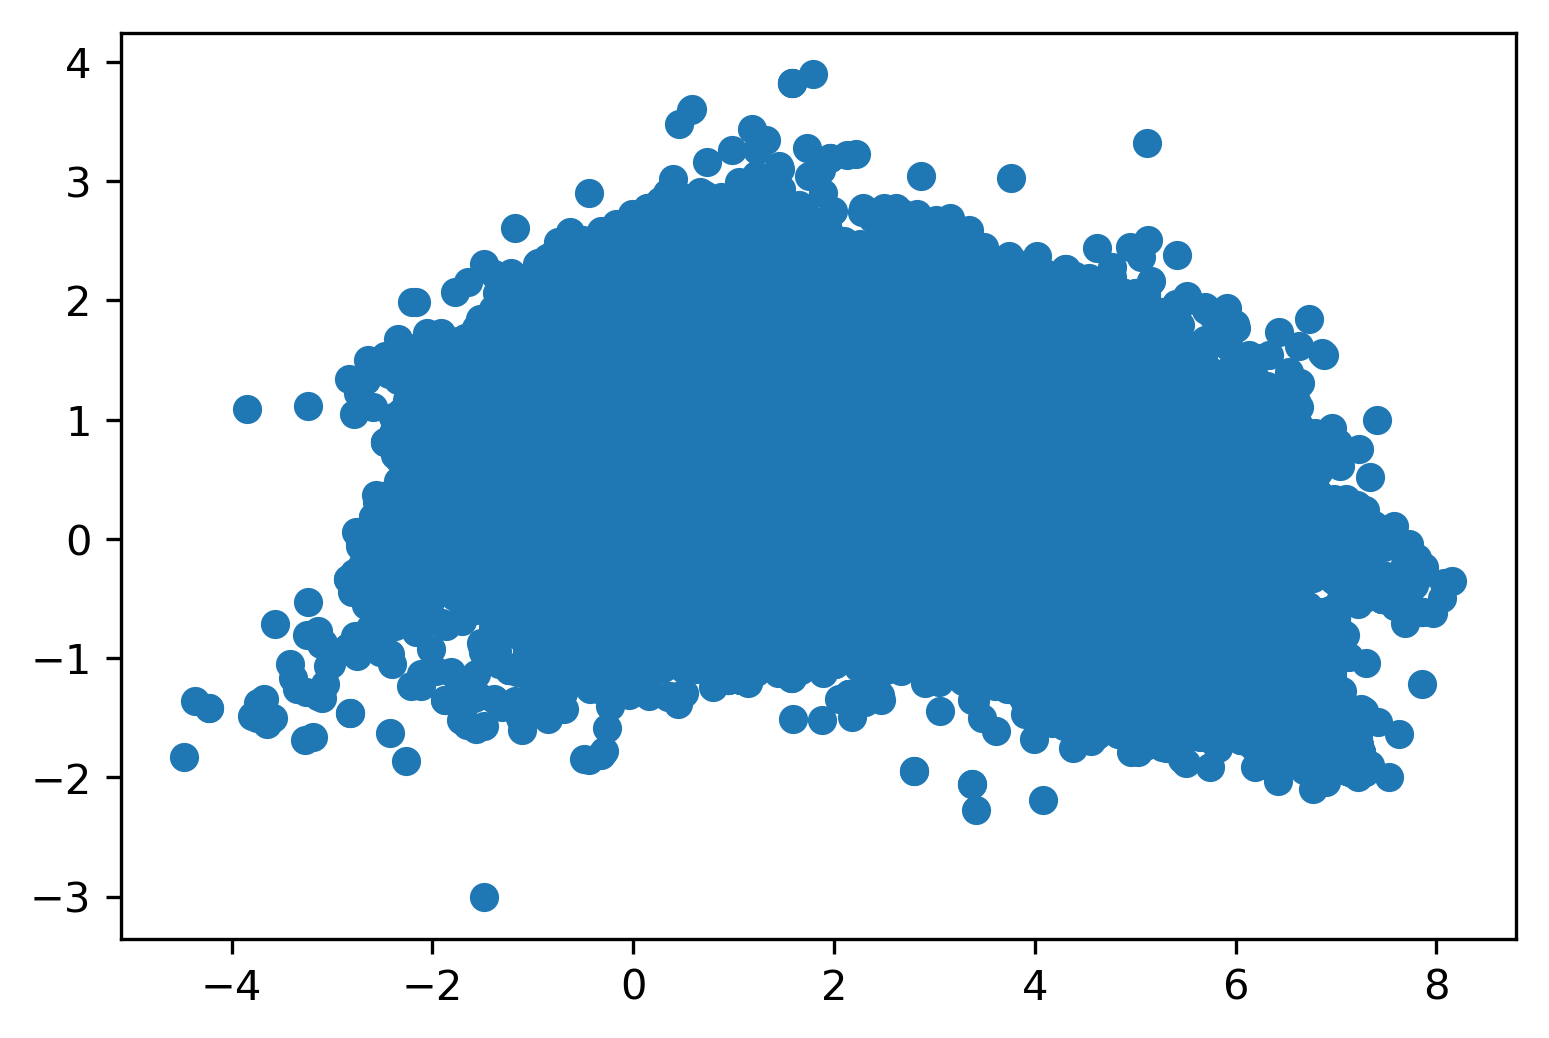

In [29]:
fig, ax = plt.subplots(dpi=300)
# plt.ylim((-1.75, 2.25))
# plt.xlim((-2.25, 1.75))
ax.scatter(vector_x, vector_y)

In [32]:
vector_x = []
vector_y = []
label = []
observed_label = ['was daughter of', 'was son of',
                  #'are languages of', 'are official languages of', 'is spoken in',
                  #'is nation in', 'is state in', 'is country in'
                 ]
for index, row in rel_label_unique.iterrows():
    label_txt = rel_label[index]
    if label_txt in observed_label:
#         label.append(label_txt)
        label.append('')
        vector_x.append(rel_vector['el1'][index])
        vector_y.append(rel_vector['el2'][index])

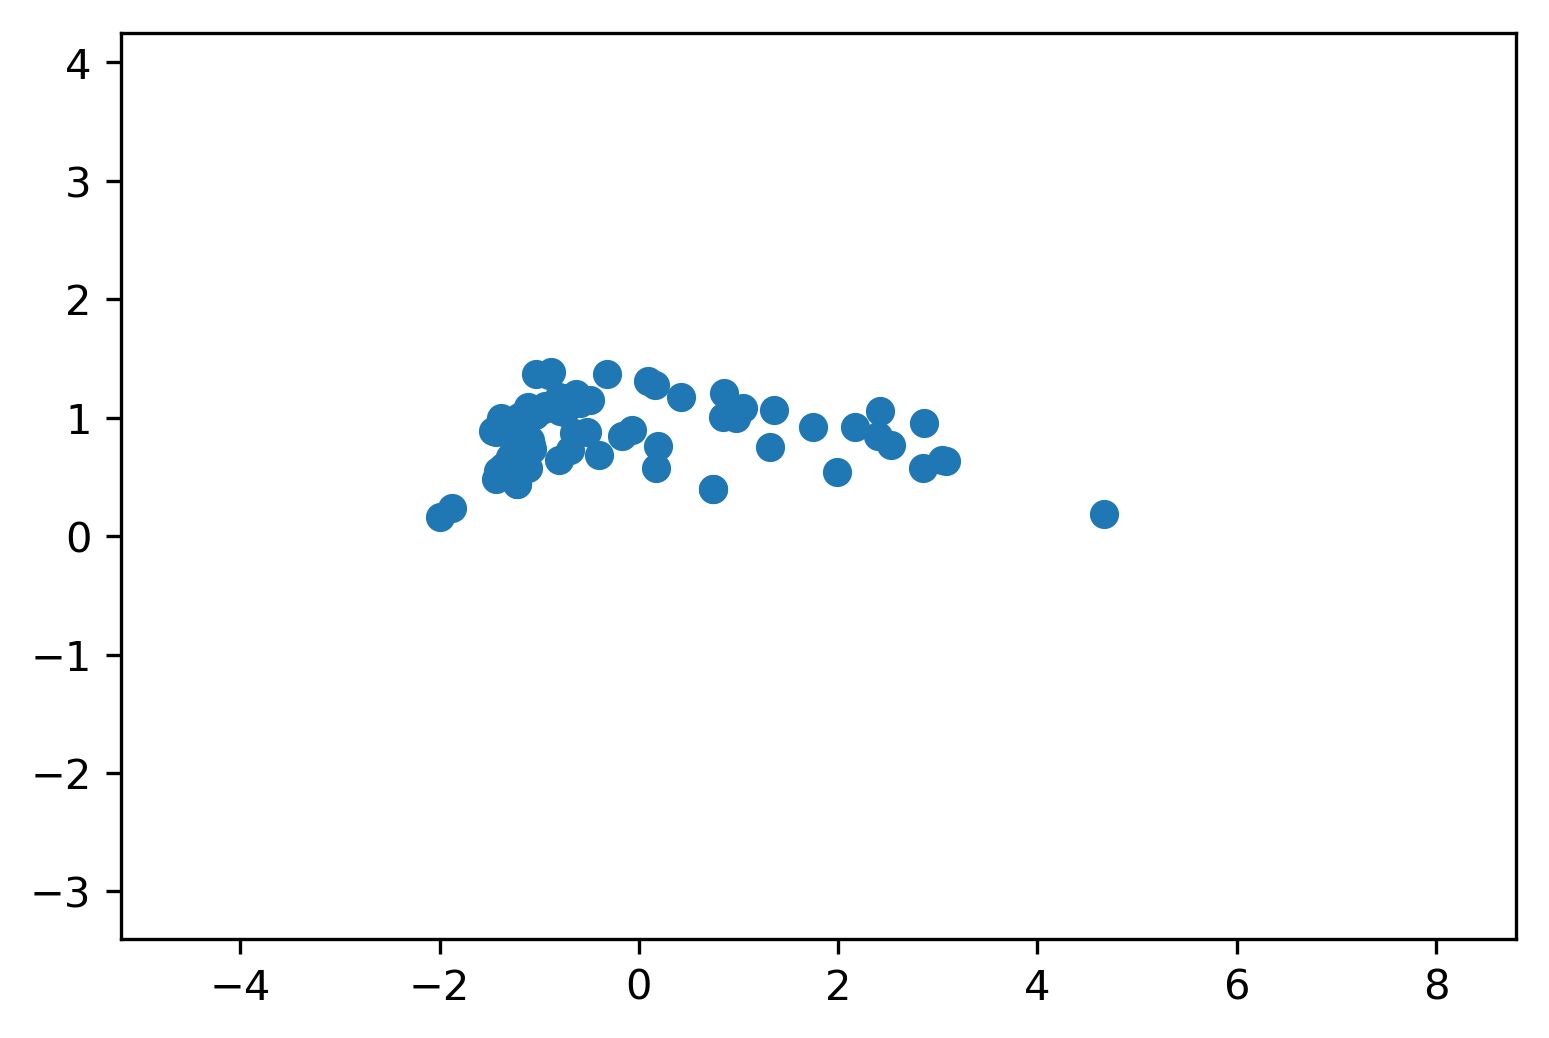

In [38]:
fig, ax = plt.subplots(dpi=300)
ax.scatter(vector_x, vector_y)
plt.ylim((-3.4, 4.25))
plt.xlim((-5.2, 8.8))

for i, txt in enumerate(label):
    ax.annotate(txt, (vector_x[i], vector_y[i]))

### Relation Coverage

In [41]:
# rel_predict = pd.read_csv('predict/oie_def_ent_root/predict_result_sort.tsv', sep='\t', header=None, names=['rel_kb', 'rel_oie', 'label'])
rel_predict_0 = predict_pcnn_ent[predict_pcnn_ent.label != 1]
rel_predict_1 = predict_pcnn_ent[predict_pcnn_ent.label != 0]
rel_oie_0 = set(rel_predict_0['oie_rel'])
rel_oie_1 = set(rel_predict_1['oie_rel'])

In [42]:
rel_oie_0

{'Deadland a state in northwestern United States on the Pacific sports equipment consisting of a heavy metal ball used in the shot put a rare soft silvery metallic element; occurs in small quantities in sphalerite Georgia',
 'Rembrandt Bugatti represent, as of a character on stage the divine word of God; the second person in the Trinity (incarnate in Jesus) Carlo Bugatti',
 'Royal Christmas expose to cool or cold air so as to cool or freshen in a state required for something to function or be effective Hallmark Channel',
 'PixelJunk Shooter happen, occur, take place; this was during the visit to my parents\' house" declared publicly; made widely known so as to pass a given point Q-Games',
 'Our Blushing Brides mark with an asterisk Dorothy Sebastian',
 'Detroit Automobile Company happen, occur, take place; this was during the visit to my parents\' house" organized again Henry Ford Company',
 'Sekhemre-Heruhirmaat Intef represent, as of a character on stage to a degree possible of achie

In [43]:
uncovered_rel = set([x for x in rel_oie_1 if x not in rel_oie_0])

In [44]:
uncovered_rel

{'656 Beagle represent, as of a character on stage asteroid from regions of asteroid belt approximately in diameter',
 'Sonic Underground perform a work for the first time a rare soft silvery metallic element; occurs in small quantities in sphalerite France',
 'Lane Bryant to remain unmolested, undisturbed, or uninterrupted -- used only in infinitive form Today large retail chain present in many shopping centers across United States',
 'Seed mark with an asterisk Will Yun Lee produced by Joe Hahn of Linkin Park',
 'Le fils du Français have an existence, be extant 1999 comedy-adventure film directed',
 'Indiana Lotus have an existence, be extant unincorporated community',
 'Deep Green Resistance have sex with; archaic use have a disagreement over something account',
 'Shin-Aomori Station Shin-Aomori Station represent, as of a character on stage either end of a railroad or bus route Ōu Main Line',
 'Dragon Gate offices to remain unmolested, undisturbed, or uninterrupted -- used only in i

In [47]:
len(uncovered_rel), len(set(predict_pcnn_ent['oie_rel']))

(112680, 115545)

In [38]:
with open('predict/oie_def/uncovered_oie_rel.txt', 'w') as f:
    for item in uncovered_rel:
        f.write("%s\n" % item)

In [23]:
import torch
import torch.nn.functional as F

In [53]:
t4d = torch.empty(16, 4)
p1d = (0, 1) # pad last dim by 1 on each side
out = F.pad(t4d, p1d)  # effectively zero padding

In [54]:
t4d

tensor(1.00000e-16 *
       [[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.4408,  0.0000],
        [ 1.4461,  0.0000,  0.0706,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.4461,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000]])

In [55]:
out

tensor(1.00000e-16 *
       [[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.4408,  0.0000,  0.0000],
        [ 1.4461,  0.0000,  0.0706,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.4461,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])